# DISTRIBUTION PLOTS

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# allows plots to show in line
%matplotlib inline

In [6]:
tips = pd.read_csv('tips.csv')

clsd = pd.read_csv('Classified Data', index_col = 0)

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
clsd.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [8]:
plt.style.use('ggplot')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


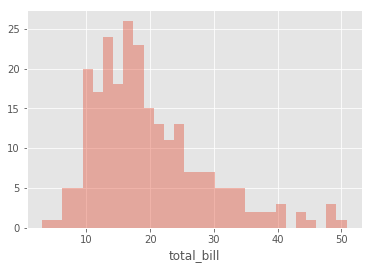

In [16]:
sns.distplot(tips['total_bill'], kde = False, bins = 30)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


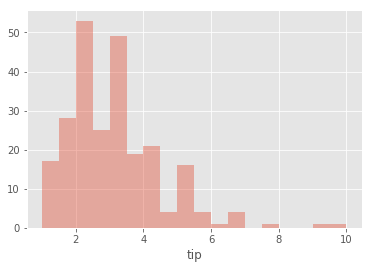

In [19]:
sns.distplot(tips['tip'], kde = False)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


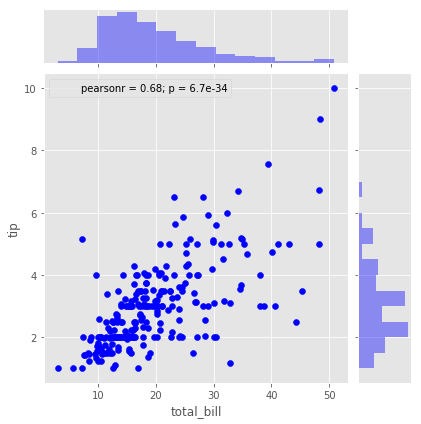

In [21]:
sns.jointplot(tips['total_bill'], tips['tip'], color = 'blue')

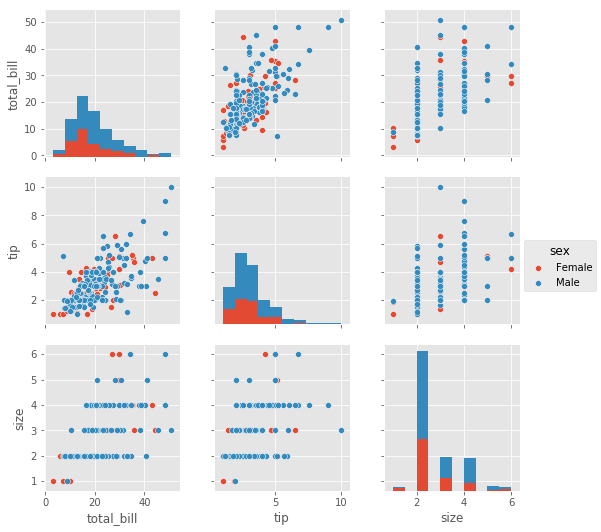

In [9]:
sns.pairplot(tips, hue = 'sex')

In [ ]:
sns.pairplot(clsd, hue = 'FDJ')

In [13]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feature do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean and unit variance).
 |  
 |  For instance many elements used in the objective function of
 |  a learning algorithm (such as the RBF kernel of Support Vector
 |  Machines or the L1 and L2 regularizers of linear models) assume that
 |  all features are centered around 0 an

In [55]:
sc = MinMaxScaler()

In [56]:
clsd.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [57]:
sc.fit(clsd.drop('TARGET CLASS', axis = 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [58]:
clsd.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [59]:
clfd = sc.fit_transform(clsd)

clfd

array([[0.4779121 , 0.51759273, 0.25584607, ..., 0.33821385, 0.47176676,
        1.        ],
       [0.29806768, 0.40386405, 0.23483597, ..., 0.16862214, 0.68009105,
        0.        ],
       [0.3534701 , 0.54590434, 0.48399637, ..., 0.38981083, 0.51496952,
        0.        ],
       ...,
       [0.62109238, 0.3885955 , 0.39372412, ..., 0.36436871, 0.59462402,
        1.        ],
       [0.58840762, 0.30191296, 0.15223219, ..., 0.59998625, 0.43720711,
        1.        ],
       [0.42850058, 0.37331294, 0.15857854, ..., 0.58665816, 0.57814674,
        1.        ]])

In [60]:
clfd = pd.DataFrame(clfd)

In [61]:
clfd.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1.0
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0.0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0.0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1.0
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1.0


In [62]:
clfd[10].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: 10, dtype: float64

In [50]:
data = clfd.drop(10, axis = 1)
target = clfd[10]

In [51]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [52]:
target.head()

0    1.0
1   -1.0
2   -1.0
3    1.0
4    1.0
Name: 10, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 89)

In [122]:
knn = KNeighborsClassifier(n_neighbors = 11)

In [123]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [124]:
predy = knn.predict(X_test)

In [125]:
print(classification_report(y_test, predy))

             precision    recall  f1-score   support

       -1.0       0.96      0.96      0.96        96
        1.0       0.96      0.96      0.96       104

avg / total       0.96      0.96      0.96       200



In [126]:
(accuracy_score(y_test, predy)) * 100

96.0

In [127]:
# THE ELBOW METHOD

err = []

for i in range(1, 40):
    knn2  = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    pred = knn2.predict(X_test)
    err.append((accuracy_score(y_test, pred)) * 100)

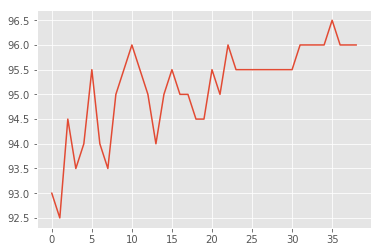

In [128]:
plt.plot(err)

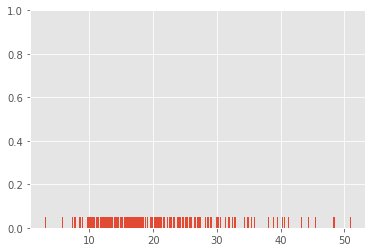

In [18]:
sns.rugplot(tips['total_bill'])

# CATEGORICAL PLOTS

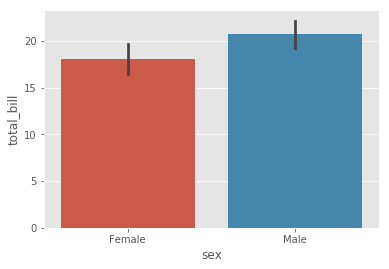

In [29]:
sns.barplot(tips['sex'], tips['total_bill'])

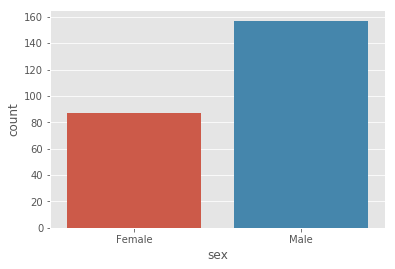

In [33]:
sns.countplot(tips['sex'])

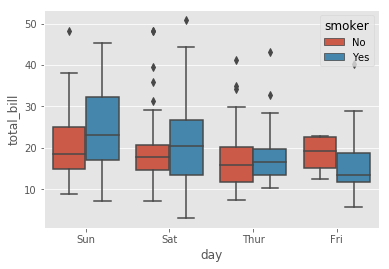

In [39]:
sns.boxplot(tips['day'], tips['total_bill'], hue = tips['smoker'])

### VIOLIN PLOT

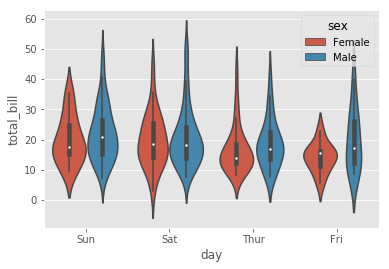

In [40]:
sns.violinplot(tips['day'], tips['total_bill'], hue = tips['sex'])

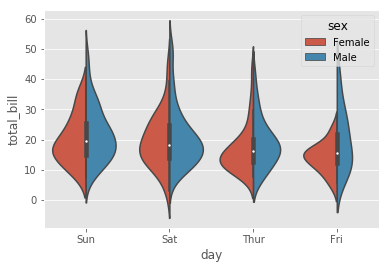

In [42]:
sns.violinplot(tips['day'], tips['total_bill'], hue = tips['sex'], split = True)

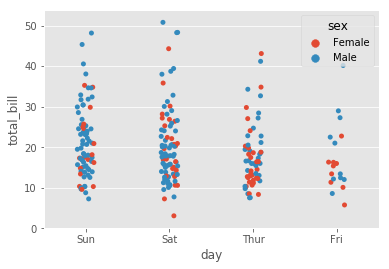

In [44]:
sns.stripplot(tips['day'], tips['total_bill'], hue = tips['sex'], jitter = True)

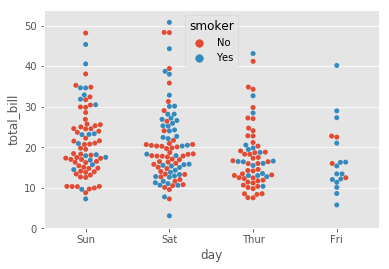

In [46]:
sns.swarmplot('day', 'total_bill', hue = 'smoker', data = tips)

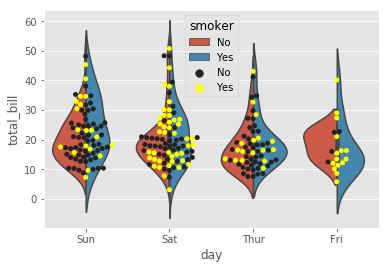

In [49]:
sns.violinplot('day', 'total_bill', hue = 'smoker', split = True, data = tips)
sns.swarmplot('day', 'total_bill', hue = 'smoker', data = tips, color = 'yellow')

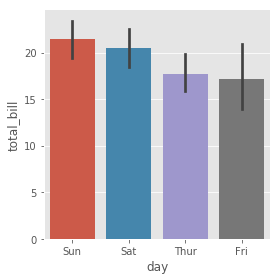

In [50]:
sns.factorplot('day', 'total_bill', data = tips, kind = 'bar')

# MATRIX PLOTS

In [51]:
flight = pd.read_csv('flights.csv')

In [52]:
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [54]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null object
passengers    144 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [55]:
flight.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [57]:
# correlation
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


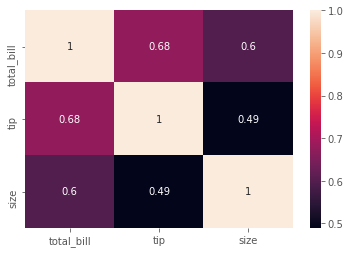

In [60]:
sns.heatmap(tips.corr(), annot = True)
# anotation imcreases clarity

In [63]:
fp = flight.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


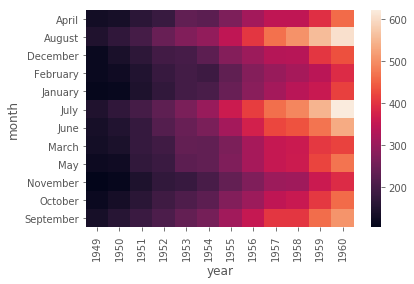

In [66]:
sns.heatmap(fp)

ValueError: could not convert string to float: 'December'

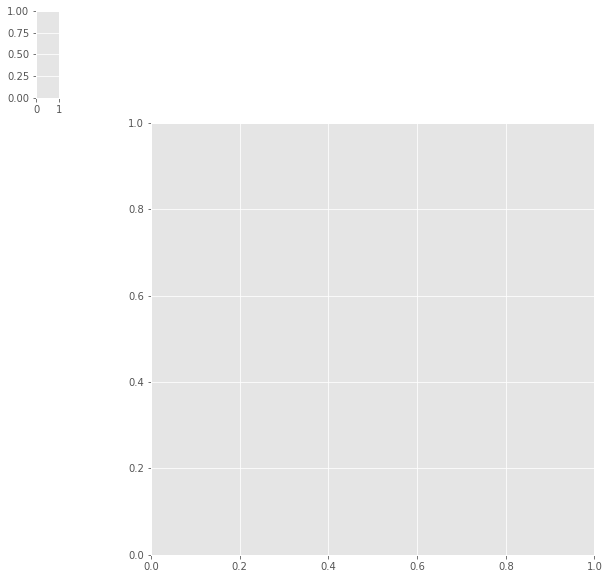

In [73]:
sns.clustermap(data = flight)

# REGRESSION PLOTS

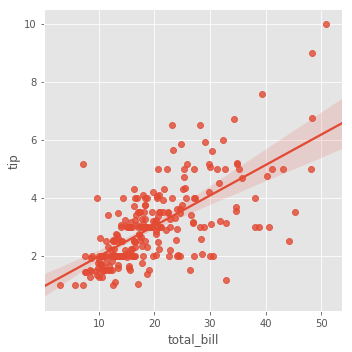

In [71]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)